## __YOLOv8__

- YOLOv8のコード: https://github.com/ultralytics/ultralytics

- YOLOv8のドキュメント: https://docs.ultralytics.com/

以下4つの機能を試す。

- 物体検出

- セグメンテーション

- 画像分類

- 姿勢推定

### __準備__

In [2]:
!pip install ultralytics | tail -n1

In [17]:
from IPython.display import Image
from ultralytics import YOLO

### __物体検出__


Found https://ultralytics.com/images/bus.jpg locally at bus.jpg
image 1/1 /content/bus.jpg: 640x480 4 persons, 1 bus, 1 stop sign, 302.8ms
Speed: 7.8ms preprocess, 302.8ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 480)


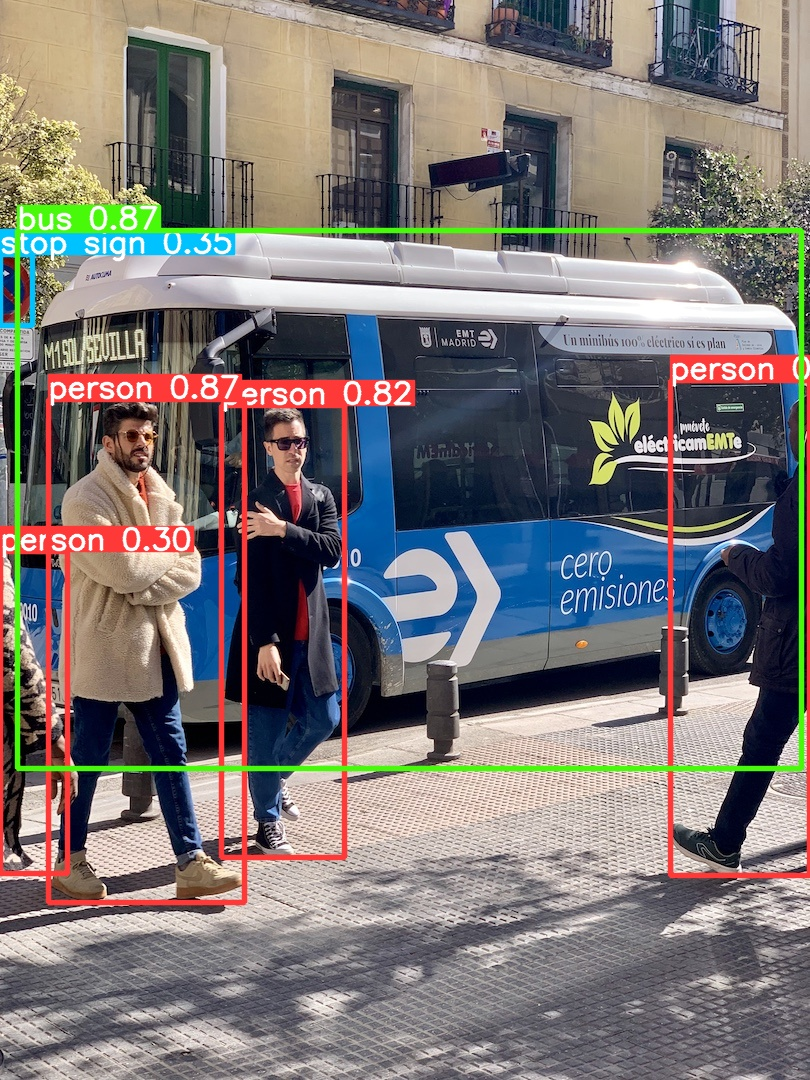

In [18]:
model = YOLO("yolov8n.pt")
results = model("https://ultralytics.com/images/bus.jpg") # URLも指定可能

result = results[0]
result.save("object-detection.jpg") # 結果画像の保存

Image("object-detection.jpg")

物体検出の結果は`result.boxes`にある。

`result.boxes`の重要キーについて

- `cls`: 検出した物体の種類を表す数字(id)。idと物体名の対応関係は`result.names`にある。YOLOv8は80種類の物体しか検出できない。

- `conf`: 検出した物体に対する確信度。

- `xywh`: xywhフォーマットのbbox座標情報。2次元のデータとなっており、bboxの（中心のx座標、中心のy座標、幅、高さ）の情報が、検出した物体の数だけ格納されている。

- `xyxy`: xyxtフォーマットのbbox座標情報。2次元のデータとなっており、bboxの（左上のx座標、左上のy座標、右下のx座標、右下のx座標）の情報が、検出した物体の数だけ格納されている。

In [5]:
result.boxes

ultralytics.engine.results.Boxes object with attributes:

cls: tensor([ 5.,  0.,  0.,  0., 11.,  0.])
conf: tensor([0.8705, 0.8690, 0.8536, 0.8193, 0.3461, 0.3013])
data: tensor([[1.7286e+01, 2.3059e+02, 8.0152e+02, 7.6841e+02, 8.7055e-01, 5.0000e+00],
        [4.8739e+01, 3.9926e+02, 2.4450e+02, 9.0250e+02, 8.6898e-01, 0.0000e+00],
        [6.7027e+02, 3.8028e+02, 8.0986e+02, 8.7569e+02, 8.5360e-01, 0.0000e+00],
        [2.2139e+02, 4.0579e+02, 3.4472e+02, 8.5739e+02, 8.1931e-01, 0.0000e+00],
        [6.4347e-02, 2.5464e+02, 3.2288e+01, 3.2504e+02, 3.4607e-01, 1.1000e+01],
        [0.0000e+00, 5.5101e+02, 6.7105e+01, 8.7394e+02, 3.0129e-01, 0.0000e+00]])
id: None
is_track: False
orig_shape: (1080, 810)
shape: torch.Size([6, 6])
xywh: tensor([[409.4020, 499.4990, 784.2324, 537.8136],
        [146.6206, 650.8826, 195.7623, 503.2372],
        [740.0637, 627.9874, 139.5887, 495.4068],
        [283.0555, 631.5919, 123.3235, 451.6003],
        [ 16.1764, 289.8419,  32.2241,  70.3949],
     

In [6]:
result.names

{0: 'person',
 1: 'bicycle',
 2: 'car',
 3: 'motorcycle',
 4: 'airplane',
 5: 'bus',
 6: 'train',
 7: 'truck',
 8: 'boat',
 9: 'traffic light',
 10: 'fire hydrant',
 11: 'stop sign',
 12: 'parking meter',
 13: 'bench',
 14: 'bird',
 15: 'cat',
 16: 'dog',
 17: 'horse',
 18: 'sheep',
 19: 'cow',
 20: 'elephant',
 21: 'bear',
 22: 'zebra',
 23: 'giraffe',
 24: 'backpack',
 25: 'umbrella',
 26: 'handbag',
 27: 'tie',
 28: 'suitcase',
 29: 'frisbee',
 30: 'skis',
 31: 'snowboard',
 32: 'sports ball',
 33: 'kite',
 34: 'baseball bat',
 35: 'baseball glove',
 36: 'skateboard',
 37: 'surfboard',
 38: 'tennis racket',
 39: 'bottle',
 40: 'wine glass',
 41: 'cup',
 42: 'fork',
 43: 'knife',
 44: 'spoon',
 45: 'bowl',
 46: 'banana',
 47: 'apple',
 48: 'sandwich',
 49: 'orange',
 50: 'broccoli',
 51: 'carrot',
 52: 'hot dog',
 53: 'pizza',
 54: 'donut',
 55: 'cake',
 56: 'chair',
 57: 'couch',
 58: 'potted plant',
 59: 'bed',
 60: 'dining table',
 61: 'toilet',
 62: 'tv',
 63: 'laptop',
 64: 'mou

### __セグメンテーション__


image 1/1 /content/bus.jpg: 640x480 4 persons, 1 bus, 1 skateboard, 210.7ms
Speed: 3.3ms preprocess, 210.7ms inference, 20.2ms postprocess per image at shape (1, 3, 640, 480)


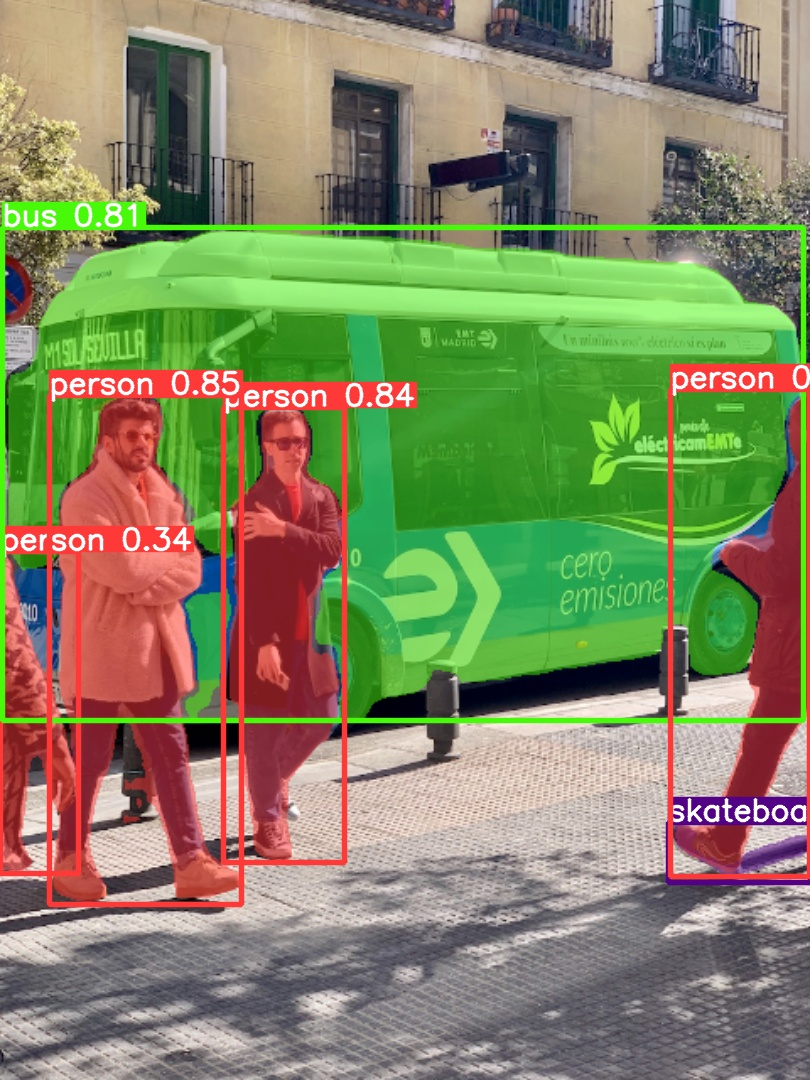

In [20]:
model = YOLO("yolov8n-seg.pt") # セグメンテーション用のモデルを読み込む
results = model("bus.jpg")

result = results[0]
result.save("segmentaion.jpg") # 結果画像の保存

Image("segmentaion.jpg")

セグメンテーションの結果は`result.masks.data`にあり、これは（セグメンテーションした数×マスク画像）の3次元のデータである。

YOLOv8はインスタンスセグメンテーションを行う。

物体検出の結果は`result.boxes`にあり、そこに格納されているbboxの順番と、`result.masks.data`のマスク画像の順番は対応している。

In [8]:
result.masks.data

tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 

In [9]:
# 物体検出の結果
result.boxes

ultralytics.engine.results.Boxes object with attributes:

cls: tensor([ 0.,  0.,  0.,  5.,  0., 36.])
conf: tensor([0.8875, 0.8518, 0.8420, 0.8066, 0.3430, 0.3350])
data: tensor([[6.7012e+02, 3.8967e+02, 8.0949e+02, 8.7650e+02, 8.8753e-01, 0.0000e+00],
        [4.9136e+01, 3.9597e+02, 2.4117e+02, 9.0409e+02, 8.5176e-01, 0.0000e+00],
        [2.2319e+02, 4.0759e+02, 3.4405e+02, 8.6207e+02, 8.4200e-01, 0.0000e+00],
        [2.4104e+00, 2.2786e+02, 8.0302e+02, 7.2062e+02, 8.0659e-01, 5.0000e+00],
        [0.0000e+00, 5.5112e+02, 7.8029e+01, 8.7387e+02, 3.4300e-01, 0.0000e+00],
        [6.6864e+02, 8.2284e+02, 8.1000e+02, 8.8203e+02, 3.3501e-01, 3.6000e+01]])
id: None
is_track: False
orig_shape: (1080, 810)
shape: torch.Size([6, 6])
xywh: tensor([[739.8075, 633.0853, 139.3708, 486.8358],
        [145.1526, 650.0331, 192.0326, 508.1233],
        [283.6209, 634.8312, 120.8660, 454.4849],
        [402.7171, 474.2405, 800.6132, 492.7648],
        [ 39.0143, 712.4948,  78.0287, 322.7491],
     

### __画像分類__


image 1/1 /content/bus.jpg: 224x224 minibus 0.54, police_van 0.24, trolleybus 0.06, golfcart 0.02, streetcar 0.02, 23.6ms
Speed: 16.0ms preprocess, 23.6ms inference, 0.1ms postprocess per image at shape (1, 3, 224, 224)


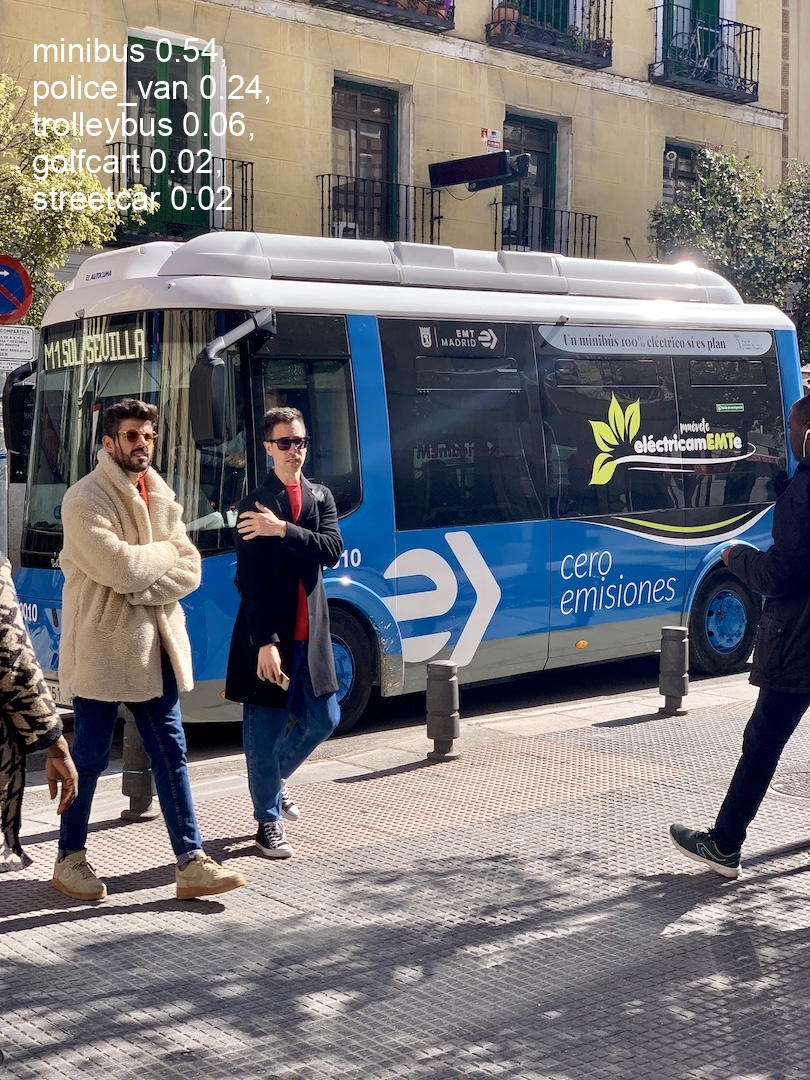

In [21]:
model = YOLO("yolov8n-cls.pt") # 画像分類用のモデルを読み込む
results = model("bus.jpg")

result = results[0]
result.save("classification.jpg") # 結果画像の保存

Image("classification.jpg")

画像分類の結果は`result.probs`にある。

`result.probs`の重要キーについて

- `data`: YOLOv8が分類対象とする1000種類のクラスに対する確信度。画像分類できる対象は`result.names`にある。

- `top1`: 分類されたクラスのid。`data`の中でも最も確信度が高いクラスのid。

- `top1conf`: `top1`に対する確信度

- `top5`: 確信度が高いクラス上位5件。`data`の中でも最も確信度が高い上位5件のクラスのid。

- `top5conf`: `top5`に対する確信度

In [11]:
result.probs

ultralytics.engine.results.Probs object with attributes:

data: tensor([1.2406e-08, 2.6841e-07, 4.3289e-05, 6.0048e-06, 3.8984e-05, 1.1361e-06, 1.9882e-07, 4.8868e-06, 3.4368e-08, 1.8475e-06, 1.6144e-09, 2.1578e-08, 3.2268e-07, 5.4272e-10, 1.5328e-05, 8.0444e-09, 6.1773e-09, 1.2639e-05, 1.3218e-06, 9.1779e-09, 1.9062e-10, 9.1052e-09, 8.2253e-07, 6.9553e-08, 5.0361e-08, 2.6874e-08,
        1.2460e-08, 1.1650e-08, 1.0276e-08, 1.1152e-06, 6.8643e-09, 7.0475e-09, 4.2124e-08, 6.6990e-06, 3.6316e-05, 1.2337e-08, 2.7736e-07, 7.2303e-08, 5.1885e-09, 2.1677e-06, 2.2349e-08, 7.8658e-08, 6.0241e-07, 2.8653e-07, 2.9273e-08, 1.7498e-06, 3.8191e-08, 4.0130e-09, 3.0575e-07, 3.3788e-08, 6.6310e-07, 4.3473e-05,
        1.3571e-07, 1.7258e-08, 2.6373e-07, 2.3155e-08, 4.6762e-08, 2.1801e-08, 1.9327e-08, 2.9597e-08, 2.5085e-06, 3.2232e-06, 1.6072e-06, 3.1921e-07, 8.2688e-08, 1.4717e-05, 4.3826e-09, 2.3635e-06, 2.1364e-08, 1.4411e-07, 8.2528e-09, 3.9612e-07, 9.2008e-08, 3.9951e-07, 4.5113e-08, 1.8609e-08, 

In [12]:
result.names

{0: 'tench',
 1: 'goldfish',
 2: 'great_white_shark',
 3: 'tiger_shark',
 4: 'hammerhead',
 5: 'electric_ray',
 6: 'stingray',
 7: 'cock',
 8: 'hen',
 9: 'ostrich',
 10: 'brambling',
 11: 'goldfinch',
 12: 'house_finch',
 13: 'junco',
 14: 'indigo_bunting',
 15: 'robin',
 16: 'bulbul',
 17: 'jay',
 18: 'magpie',
 19: 'chickadee',
 20: 'water_ouzel',
 21: 'kite',
 22: 'bald_eagle',
 23: 'vulture',
 24: 'great_grey_owl',
 25: 'European_fire_salamander',
 26: 'common_newt',
 27: 'eft',
 28: 'spotted_salamander',
 29: 'axolotl',
 30: 'bullfrog',
 31: 'tree_frog',
 32: 'tailed_frog',
 33: 'loggerhead',
 34: 'leatherback_turtle',
 35: 'mud_turtle',
 36: 'terrapin',
 37: 'box_turtle',
 38: 'banded_gecko',
 39: 'common_iguana',
 40: 'American_chameleon',
 41: 'whiptail',
 42: 'agama',
 43: 'frilled_lizard',
 44: 'alligator_lizard',
 45: 'Gila_monster',
 46: 'green_lizard',
 47: 'African_chameleon',
 48: 'Komodo_dragon',
 49: 'African_crocodile',
 50: 'American_alligator',
 51: 'triceratops',
 

In [14]:
# 確信度の合計は1になることを確認
result.probs.data.sum()

tensor(1.0000)

### __姿勢推定__

YOLOv8のキーポイント定義

<img src=" https://learnopencv.com/wp-content/uploads/2021/05/fix-overlay-issue.jpg">


image 1/1 /content/bus.jpg: 640x480 4 persons, 187.6ms
Speed: 5.3ms preprocess, 187.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


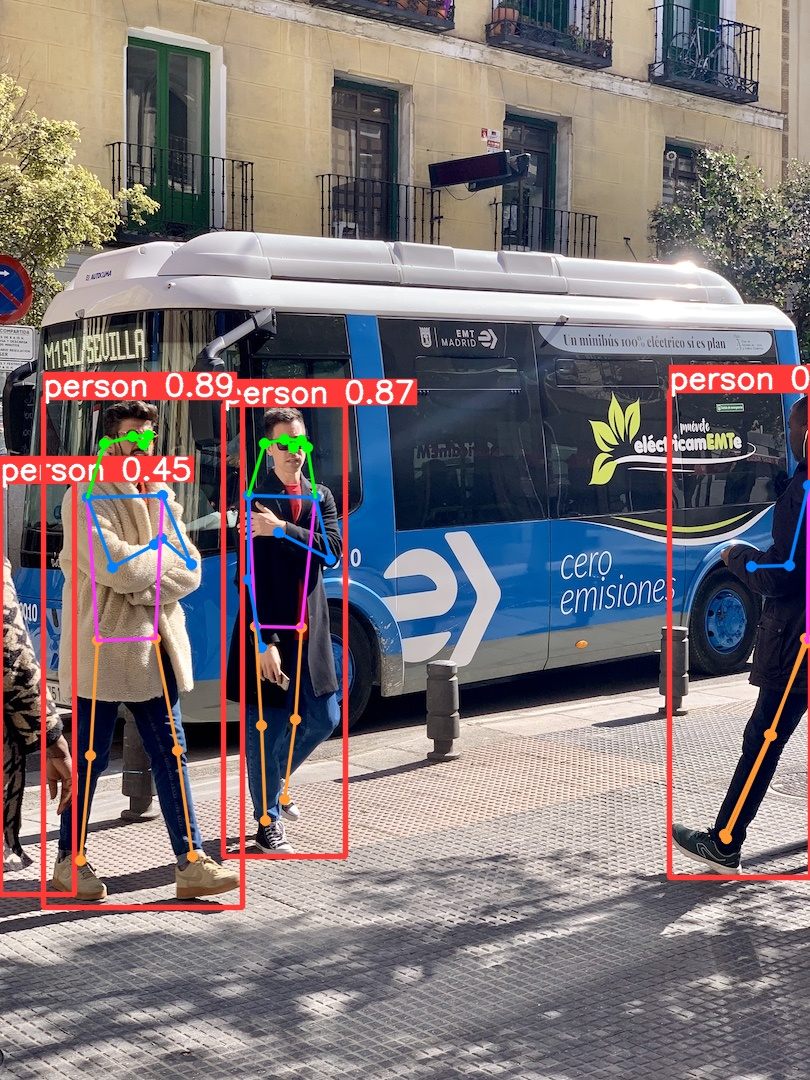

In [22]:
model = YOLO("yolov8n-pose.pt") # 姿勢推定用のモデルを読み込む
results = model("bus.jpg")

result = results[0]
result.save("pose.jpg") # 結果画像の保存

Image("pose.jpg")

姿勢推定の結果は`result.keypoints`にある。

`result.keypoints`の重要キーについて

- `conf`: 17個のキーポイントに対する確信度の配列が、人間の数だけ格納されている。

- `xy`: 17個のキーポイントに対する確信度の(x座標, y座標)が、人間の数だけ格納されている。

In [16]:
result.keypoints

ultralytics.engine.results.Keypoints object with attributes:

conf: tensor([[0.9803, 0.9045, 0.9619, 0.4214, 0.8145, 0.9860, 0.9896, 0.9528, 0.9695, 0.9332, 0.9532, 0.9936, 0.9943, 0.9881, 0.9897, 0.9473, 0.9509],
        [0.3290, 0.3812, 0.1012, 0.4702, 0.0773, 0.7276, 0.3672, 0.6556, 0.1500, 0.5501, 0.1800, 0.7120, 0.5182, 0.7897, 0.6158, 0.6599, 0.5291],
        [0.9791, 0.9173, 0.9580, 0.6426, 0.8594, 0.9929, 0.9963, 0.9587, 0.9806, 0.9323, 0.9598, 0.9976, 0.9981, 0.9948, 0.9963, 0.9784, 0.9826],
        [0.0141, 0.0105, 0.0073, 0.0430, 0.0262, 0.1541, 0.0851, 0.3166, 0.1467, 0.2782, 0.1496, 0.3280, 0.2620, 0.2317, 0.1889, 0.1235, 0.1075]])
data: tensor([[[1.4337e+02, 4.4484e+02, 9.8033e-01],
         [1.4827e+02, 4.3567e+02, 9.0446e-01],
         [1.3206e+02, 4.3629e+02, 9.6188e-01],
         [0.0000e+00, 0.0000e+00, 4.2136e-01],
         [1.0457e+02, 4.4318e+02, 8.1452e-01],
         [1.6294e+02, 4.9544e+02, 9.8596e-01],
         [8.7641e+01, 4.9777e+02, 9.8956e-01],
         [1.